# MPC - TP - Prediction by regression

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Load the data
ozone = pd.read_csv('ozone.txt', sep = ' ')
ozone
# y is the target variable, the other are predictive variables

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84
1,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87
2,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82
3,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92
4,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114
...,...,...,...,...,...,...,...,...,...,...,...
96,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76
97,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71
98,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77
99,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99


## Exercise 1 : Simple linear regression to predict y

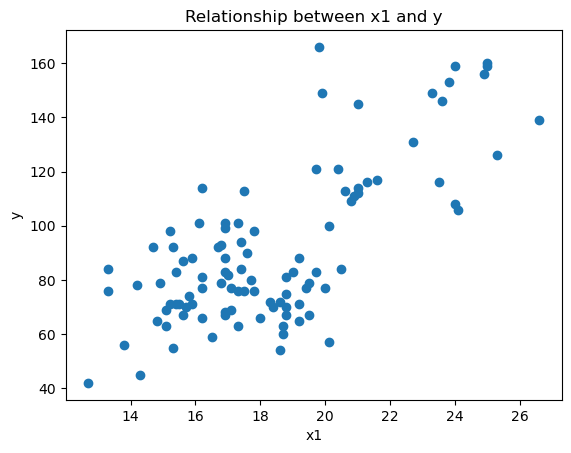

In [17]:
plt.scatter(ozone['x1'], ozone['y'])
plt.title('Relationship between x1 and y')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

In [18]:
import statsmodels.api as sm
X = ozone['x1'] # Select the column containing the predictive variable
X = sm.add_constant(X) # add a constant column for the constant term of the model (for the parameter beta_0)
print(X) # you should see 2 columns in X : a constant one (const) with ones everywhere and another with the values of x1
Y = ozone['y'] # Select the target variable and store it in Y
model = sm.OLS(Y, X).fit() # fit the model to predict Y using X
model.summary()

     const    x1
0      1.0  15.6
1      1.0  17.0
2      1.0  15.3
3      1.0  16.2
4      1.0  17.4
..     ...   ...
96     1.0  13.3
97     1.0  16.2
98     1.0  16.9
99     1.0  16.9
100    1.0  15.7

[101 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     105.5
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           2.78e-17
Time:                        16:00:23   Log-Likelihood:                -444.69
No. Observations:                 101   AIC:                             893.4
Df Residuals:                      99   BIC:                             898.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.0106     12.221     -2.701      0.008     -57.259      -8.762
x1             6.7460      0.657     10.273      0.000       5.443       8.049
==============================================================================
Omnibus:                        2.779   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.289
Skew:                           0.360   Prob(JB):                        0.318
Kurtosis:                       3.163   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract coefficients
beta_0 = model.params['const']  # Intercept
beta_1 = model.params['x1']     # Coefficient for x1

# Equation of the model
print(f"The equation of the model is: y = {beta_0:.2f} + {beta_1:.2f} * x1")

# Analyze the influence of x1 on y
p_value = model.pvalues['x1']
if p_value < 0.05:
    print("x1 has a statistically significant influence on y.")
else:
    print("x1 does not have a statistically significant influence on y.")

The equation of the model is: y = -33.01 + 6.75 * x1
x1 has a statistically significant influence on y.


In [20]:
# Prediction for the first individual
x1_first = ozone.loc[0, 'x1']  # x1 value for the first individual
prediction_first = beta_0 + beta_1 * x1_first
print(f"Prediction for the first individual: {prediction_first:.2f}")

# Residual (error) for the first individual
actual_first = ozone.loc[0, 'y']  # Actual y value for the first individual
residual_first = actual_first - prediction_first
print(f"Residual for the first individual: {residual_first:.2f}")

Prediction for the first individual: 72.23
Residual for the first individual: 14.77


In [21]:
# All the predictions made by the model on the dataset used to fit the model can be accessed by
model.fittedvalues
# Check that the fitted value for the first individual is equal to the one you computed above

0      72.226485
1      81.670840
2      70.202695
3      76.274066
4      84.369227
         ...    
96     56.710759
97     76.274066
98     80.996243
99     80.996243
100    72.901082
Length: 101, dtype: float64

In [22]:
# All the residuals made by the model on the dataset used to fit the model can be accessed by
model.resid
# Check that the residual for the first individual is equal to the one you computed above

0      14.773515
1       0.329160
2      21.797305
3      37.725934
4       9.630773
         ...    
96     27.289241
97      0.725934
98     18.003757
99      2.003757
100    -2.901082
Length: 101, dtype: float64

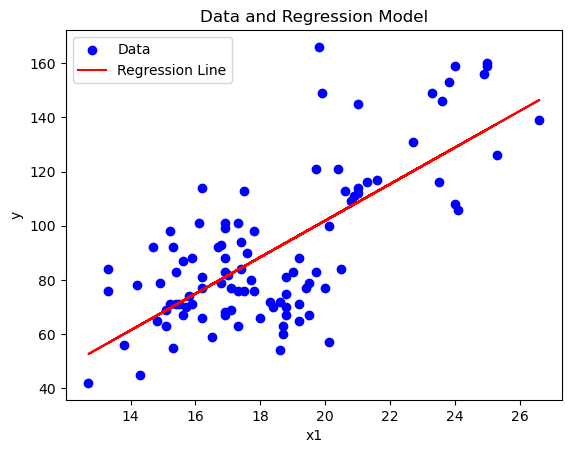

In [24]:
# Scatter plot for the data
plt.scatter(ozone['x1'], ozone['y'], label='Data', color='blue')

# Regression line
plt.plot(ozone['x1'], model.fittedvalues, label='Regression Line', color='red')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Data and Regression Model')
plt.legend()
plt.show()

In [25]:
# R^2 of the model
r_squared = model.rsquared
print(f"R^2 of the model: {r_squared:.4f}")

# Compute I_r (sum of squared residuals)
I_r = np.sum(model.resid ** 2)
print(f"I_r (sum of squared residuals): {I_r:.4f}")

# Compute I_t (total sum of squares)
y_mean = np.mean(Y)
I_t = np.sum((Y - y_mean) ** 2)
print(f"I_t (total sum of squares): {I_t:.4f}")

# Deduce I_m (explained sum of squares)
I_m = I_t - I_r
print(f"I_m (explained sum of squares): {I_m:.4f}")

R^2 of the model: 0.5160
I_r (sum of squared residuals): 39455.8049
I_t (total sum of squares): 81516.0594
I_m (explained sum of squares): 42060.2545


In [26]:
# Create the regression model for y using x4
X_x4 = ozone['x4']  # Select x4 as the predictive variable
X_x4 = sm.add_constant(X_x4)  # Add a constant column
Y = ozone['y']  # Target variable
model_x4 = sm.OLS(Y, X_x4).fit()  # Fit the model

# Extract R^2
r_squared_x4 = model_x4.rsquared
print(f"R^2 of the model using x4: {r_squared_x4:.4f}")

# Compute I_r (sum of squared residuals)
I_r_x4 = np.sum(model_x4.resid ** 2)
print(f"I_r (sum of squared residuals) using x4: {I_r_x4:.4f}")

# Compute I_t (total sum of squares)
I_t_x4 = np.sum((Y - y_mean) ** 2)
print(f"I_t (total sum of squares): {I_t_x4:.4f}")

# Deduce I_m (explained sum of squares)
I_m_x4 = I_t_x4 - I_r_x4
print(f"I_m (explained sum of squares) using x4: {I_m_x4:.4f}")

# Extract p-value for x4
p_value_x4 = model_x4.pvalues['x4']
print(f"P-value for x4: {p_value_x4:.4e}")

# Compare x1 and x4
print("\nComparaison:")
if r_squared > r_squared_x4:
    print("x1 has a higher R^2 and is better at explaining the variance in y.")
else:
    print("x4 has a higher R^2 and is better at explaining the variance in y.")

if I_r < I_r_x4:
    print("x1 has a lower I_r and is better at minimizing residuals.")
else:
    print("x4 has a lower I_r and is better at minimizing residuals.")

if p_value < p_value_x4:
    print("x1 has a lower p-value and is more statistically significant.")
else:
    print("x4 has a lower p-value and is more statistically significant.")

R^2 of the model using x4: 0.3782
I_r (sum of squared residuals) using x4: 50688.4199
I_t (total sum of squares): 81516.0594
I_m (explained sum of squares) using x4: 30827.6395
P-value for x4: 7.8310e-12

Comparaison:
x1 has a higher R^2 and is better at explaining the variance in y.
x1 has a lower I_r and is better at minimizing residuals.
x1 has a lower p-value and is more statistically significant.


In [27]:
# Initialize variables to store the best variable and its metrics
best_variable = None
best_r_squared = -float('inf')  # Higher is better
best_I_r = float('inf')         # Lower is better
best_p_value = float('inf')     # Lower is better

# Loop through all predictive variables
for i in range(1, 11):  # x1 to x10
    X_var = ozone[f'x{i}']  # Select the current variable
    X_var = sm.add_constant(X_var)  # Add a constant column
    model_var = sm.OLS(Y, X_var).fit()  # Fit the model
    
    # Extract metrics
    r_squared_var = model_var.rsquared
    I_r_var = np.sum(model_var.resid ** 2)
    p_value_var = model_var.pvalues[f'x{i}']
    
    # Compare and update the best variable
    if (r_squared_var > best_r_squared or
        (r_squared_var == best_r_squared and I_r_var < best_I_r) or
        (r_squared_var == best_r_squared and I_r_var == best_I_r and p_value_var < best_p_value)):
        best_variable = f'x{i}'
        best_r_squared = r_squared_var
        best_I_r = I_r_var
        best_p_value = p_value_var

# Print the best variable and its metrics
print(f"Best variable: {best_variable}")
print(f"R^2: {best_r_squared:.4f}")
print(f"I_r: {best_I_r:.4f}")
print(f"P-value: {best_p_value:.4e}")

Best variable: x2
R^2: 0.6129
I_r: 31555.3095
P-value: 4.0198e-22


In [28]:
# Let's load these new individuals.
ozone_new = pd.read_csv('ozone_n.txt', sep = ' ')
ozone_new

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,106,18.3,21.9,22.9,5,6,8,1.2856,-2.2981,-3.9392,101
1,60,13.7,14.0,15.8,4,5,4,0.0000,3.2139,0.0000,71
2,72,19.9,21.6,20.4,7,7,8,-3.0000,-4.5963,-5.1962,65
3,72,18.1,21.2,23.9,7,6,4,-2.5981,-3.9392,-3.7588,113
4,97,20.8,23.7,25.0,2,3,4,0.0000,1.7101,-2.7362,93
5,59,18.3,18.3,19.0,7,7,7,-3.9392,-1.9284,-1.7101,66
6,70,17.1,18.2,18.0,7,7,7,-4.3301,-7.8785,-5.1962,72
7,81,19.6,25.1,27.2,3,4,4,-1.9284,-2.5712,-4.3301,57
8,146,27.0,32.7,33.7,0,0,0,2.9544,6.5778,4.3301,121
9,78,17.7,20.2,21.5,5,5,3,0.0000,0.5209,0.0000,59


In [17]:
# I show you here how to predict the values of new data using a model
# First, we will fit a model to predict y using x1 with the ozone data as before (we don't use the new individuals to fit the model)
X = ozone.iloc[:,1] 
X = sm.add_constant(X) 
Y = ozone['y']
model = sm.OLS(Y, X).fit() 
# Then, we will prepare the new data so that it is under the same form as the data used to create the model,
# i.e. one constant column and one column with x1 values for the new data
X_new = ozone_new.iloc[:,1] # only the x1 column of the new dataset
X_new = sm.add_constant(X_new) # add the constant column
# and then we can easily predict y for this new dataset:
model.predict(X_new)
# You can see the predictions for the 10 individuals of ozone_new

0     90.440598
1     59.409146
2    101.234147
3     89.091404
4    107.305518
5     90.440598
6     82.345437
7     99.210356
8    149.130518
9     86.393017
dtype: float64

In [18]:
# Predictions for the new dataset using the model
predictions = model.predict(X_new)

# Actual values from the new dataset
actual_values = ozone_new['y']

# Compute the mean squared error
mse = np.mean((actual_values - predictions) ** 2)
print(f"Mean Squared Error of the predictions: {mse:.4f}")

Mean Squared Error of the predictions: 304.8180


In [19]:
# Prepare the new data for the best model (using x2)
X_new_best = ozone_new[['x2']]  # Select x2 as the predictive variable
X_new_best = sm.add_constant(X_new_best)  # Add a constant column

# Predict using the best model
predictions_best = model_var.predict(X_new_best)

# Compute the mean squared error for the best model
mse_best = np.mean((actual_values - predictions_best) ** 2)
print(f"Mean Squared Error of the best model (x2): {mse_best:.4f}")

# Compare the MSEs
if mse < mse_best:
    print("The model using x1 has a lower MSE and performs better.")
else:
    print("The model using x2 has a lower MSE and performs better.")

Mean Squared Error of the best model (x2): 2161.2276
The model using x1 has a lower MSE and performs better.


## Exercise 2: Multiple regression to predict y

In [20]:
X = ozone.iloc[:,[1,2]] # select columns of index 1 and 2 (i.e. x1 and x2)
X = sm.add_constant(X)
Y = ozone['y']
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     78.41
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           4.62e-21
Time:                        10:40:29   Log-Likelihood:                -433.07
No. Observations:                 101   AIC:                             872.1
Df Residuals:                      98   BIC:                             880.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.8288     10.950     -3.089      0.003     -55.558     -12.100
x1             1.0269      1.279      0.803      0.424      -1.512       3.566
x2             4.9153      0.976      5.034      0.000       2.978       6.853
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.806
Skew:                           0.163   Prob(JB):                        0.668
Kurtosis:                       2.708   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Equation of the model
beta_0 = model.params['const']  # Intercept
beta_1 = model.params['x1']     # Coefficient for x1
beta_2 = model.params['x2']     # Coefficient for x2
print(f"The equation of the model is: y = {beta_0:.2f} + {beta_1:.2f} * x1 + {beta_2:.2f} * x2")

# Result of the Student's test on x1
p_value_x1 = model.pvalues['x1']
print(f"Student's test p-value for x1: {p_value_x1:.4e}")
if p_value_x1 < 0.05:
    print("x1 has a statistically significant influence on y.")
else:
    print("x1 does not have a statistically significant influence on y.")

# R^2 of the model
r_squared_combined = model.rsquared
print(f"R^2 of the model: {r_squared_combined:.4f}")
print(f"R^2 of the model using x2 alone: {best_r_squared:.4f}")
if r_squared_combined > best_r_squared:
    print("The combined model (x1 and x2) explains more variance in y than the model using x2 alone.")
else:
    print("The model using x2 alone explains more variance in y than the combined model (x1 and x2).")

# I_r for the model
I_r_combined = np.sum(model.resid ** 2)
print(f"I_r of the model: {I_r_combined:.4f}")
print(f"I_r of the model using x2 alone: {best_I_r:.4f}")
if I_r_combined < best_I_r:
    print("The combined model (x1 and x2) has lower residual error than the model using x2 alone.")
else:
    print("The model using x2 alone has lower residual error than the combined model (x1 and x2).")

In [21]:
# Prepare the new data for the model (using x1 and x2)
X_new_combined = ozone_new[['x1', 'x2']]  # Select x1 and x2 as predictive variables
X_new_combined = sm.add_constant(X_new_combined)  # Add a constant column

# Predict using the combined model
predictions_combined = model.predict(X_new_combined)

# Compute the mean squared prediction error for the combined model
mse_combined = np.mean((ozone_new['y'] - predictions_combined) ** 2)
print(f"Mean Squared Prediction Error of the combined model (x1 and x2): {mse_combined:.4f}")

# Conclusion
if mse_combined < mse_best:
    print("The combined model (x1 and x2) performs better than the model using x2 alone.")
else:
    print("The model using x2 alone performs better than the combined model (x1 and x2).")

Mean Squared Prediction Error of the combined model (x1 and x2): 225.9460
The combined model (x1 and x2) performs better than the model using x2 alone.


## Exercise 3 : Estimation of the generalization error by train / test split.

In [1]:
import statsmodels.api as sm

def my_regression(data, idx_p, idx_t):
    """
    Create a regression model to predict the target variable using specified predictive variables.

    Parameters:
    data (pd.DataFrame): The dataset containing the variables.
    idx_p (list): List of column indexes for predictive variables.
    idx_t (int): Column index for the target variable.

    Returns:
    statsmodels.regression.linear_model.RegressionResultsWrapper: The fitted regression model.
    """
    # Select predictive variables and add a constant column
    X = data.iloc[:, idx_p]
    X = sm.add_constant(X)
    
    # Select the target variable
    Y = data.iloc[:, idx_t]
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    return model

In [3]:
def my_prediction(my_model, data):
    """
    Generate predictions using the given regression model for the provided dataset.

    Parameters:
    my_model (statsmodels.regression.linear_model.RegressionResultsWrapper): The regression model.
    data (pd.DataFrame): The dataset containing the variables.

    Returns:
    np.ndarray: Predictions made by the model.
    """
    # Get the names of the predictive variables used in the model
    predictive_vars = my_model.model.exog_names
    
    # Select the corresponding columns from the dataset
    # Ensure to exclude 'const' as it is added separately
    if 'const' in predictive_vars:
        predictive_vars.remove('const')
    X_new = data.loc[:, predictive_vars]
    
    # Add a constant column to the dataset
    X_new = sm.add_constant(X_new)
    
    # Generate predictions
    predictions = my_model.predict(X_new)
    
    return predictions 

In [ ]:

# Create a regression model using x2 and x3 as predictive variables
model_x2_x3 = my_regression(ozone, [2, 3], 0)

# Use the model to predict the individuals of ozone_new
predictions_ozone_new = my_prediction(model_x2_x3, ozone_new)

# Display the predictions
print("Predictions for ozone_new using x2 and x3:")
print(predictions_ozone_new)

Predictions for ozone_new using x2 and x3:
0     92.662833
1     50.977049
2     86.655888
3     92.200491
4    103.117455
5     72.348636
6     70.015739
7    112.372807
8    151.820282
9     83.946060
dtype: float64


In [30]:
ozone = pd.concat([ozone, ozone_new], ignore_index=True)
ozone
# We now have 111 rows (101 + 10)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84
1,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87
2,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82
3,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92
4,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114
...,...,...,...,...,...,...,...,...,...,...,...
106,59,18.3,18.3,19.0,7,7,7,-3.9392,-1.9284,-1.7101,66
107,70,17.1,18.2,18.0,7,7,7,-4.3301,-7.8785,-5.1962,72
108,81,19.6,25.1,27.2,3,4,4,-1.9284,-2.5712,-4.3301,57
109,146,27.0,32.7,33.7,0,0,0,2.9544,6.5778,4.3301,121


In [31]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(ozone, test_size = 0.25) 
# just need to give the input dataset (ozone here) and the fraction that you want in the test set (25% here)
# the two created datasets are called train and test as we have asked

In [32]:
# Check dimensions of train and test datasets
print(f"Train dataset dimensions: {train.shape}")
print(f"Test dataset dimensions: {test.shape}")

Train dataset dimensions: (83, 11)
Test dataset dimensions: (28, 11)


In [19]:
train , test = train_test_split(ozone, test_size = 0.25, random_state = 20) 
# now we will use these train and test sets until the end of this TP (unless specified)